In [1]:
import sys
sys.path.append('..')

In [2]:
from mesa import batch_run
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import contextlib
from competition.model import InnovationModel
from competition.agent import FirmAgent


  0%|          | 0/1 [00:00<?, ?it/s]

Step 1, Firm 0 TAR: 45.30704351140455, Median TAR: 48.99869136234153, Innovation Gap: 10
Step 1, Firm 1 TAR: 32.10718500058587, Median TAR: 49.510520973175076, Innovation Gap: 10
Step 1, Firm 2 TAR: 31.011573737564632, Median TAR: 49.510520973175076, Innovation Gap: 10
Step 1, Firm 3 TAR: 55.58157559151096, Median TAR: 49.510520973175076, Innovation Gap: 10
Step 1, Firm 4 TAR: 49.88643188855373, Median TAR: 49.510520973175076, Innovation Gap: 10
Step 1, Firm 5 TAR: 68.25621091752643, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 6 TAR: 62.13019196665016, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 7 TAR: 40.91671981347647, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 8 TAR: 63.078332071135335, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 9 TAR: 55.75796446495639, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 10 TAR: 23.32100729162579, Median TAR: 50.22082678460049, Innovation Gap: 10
Step 1, Firm 1

C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mesa\time.py:79: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


  0%|          | 0/1 [00:00<?, ?it/s]

Step 1, Firm 0 TAR: 72.90919926166947, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 1 TAR: 28.769155397966973, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 2 TAR: 23.18589826403046, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 3 TAR: 37.47342432079012, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 4 TAR: 32.02370771811529, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 5 TAR: 60.65017849760879, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 6 TAR: 47.888579812234084, Median TAR: 50.65011488470532, Innovation Gap: 35
Step 1, Firm 7 TAR: 33.56485090587583, Median TAR: 51.91287573654112, Innovation Gap: 35
Step 1, Firm 8 TAR: 46.64015749857982, Median TAR: 51.91287573654112, Innovation Gap: 35
Step 1, Firm 9 TAR: 68.86720824574056, Median TAR: 52.32060080827249, Innovation Gap: 35
Step 1, Firm 10 TAR: 51.665730999061864, Median TAR: 52.32060080827249, Innovation Gap: 35
Step 1, Firm 11 T

  0%|          | 0/1 [00:00<?, ?it/s]

Step 1, Firm 0 TAR: 40.943073869832304, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 1 TAR: 71.96523994365594, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 2 TAR: 51.970693027966334, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 3 TAR: 65.08418578264593, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 4 TAR: 32.115676449951124, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 5 TAR: 51.08405068102896, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 6 TAR: 35.65444893519611, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 7 TAR: 34.17746084633511, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 8 TAR: 38.94489156870233, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 9 TAR: 49.09472941071448, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 10 TAR: 42.339573327838195, Median TAR: 50.81485468780994, Innovation Gap: 60
Step 1, Firm 11 

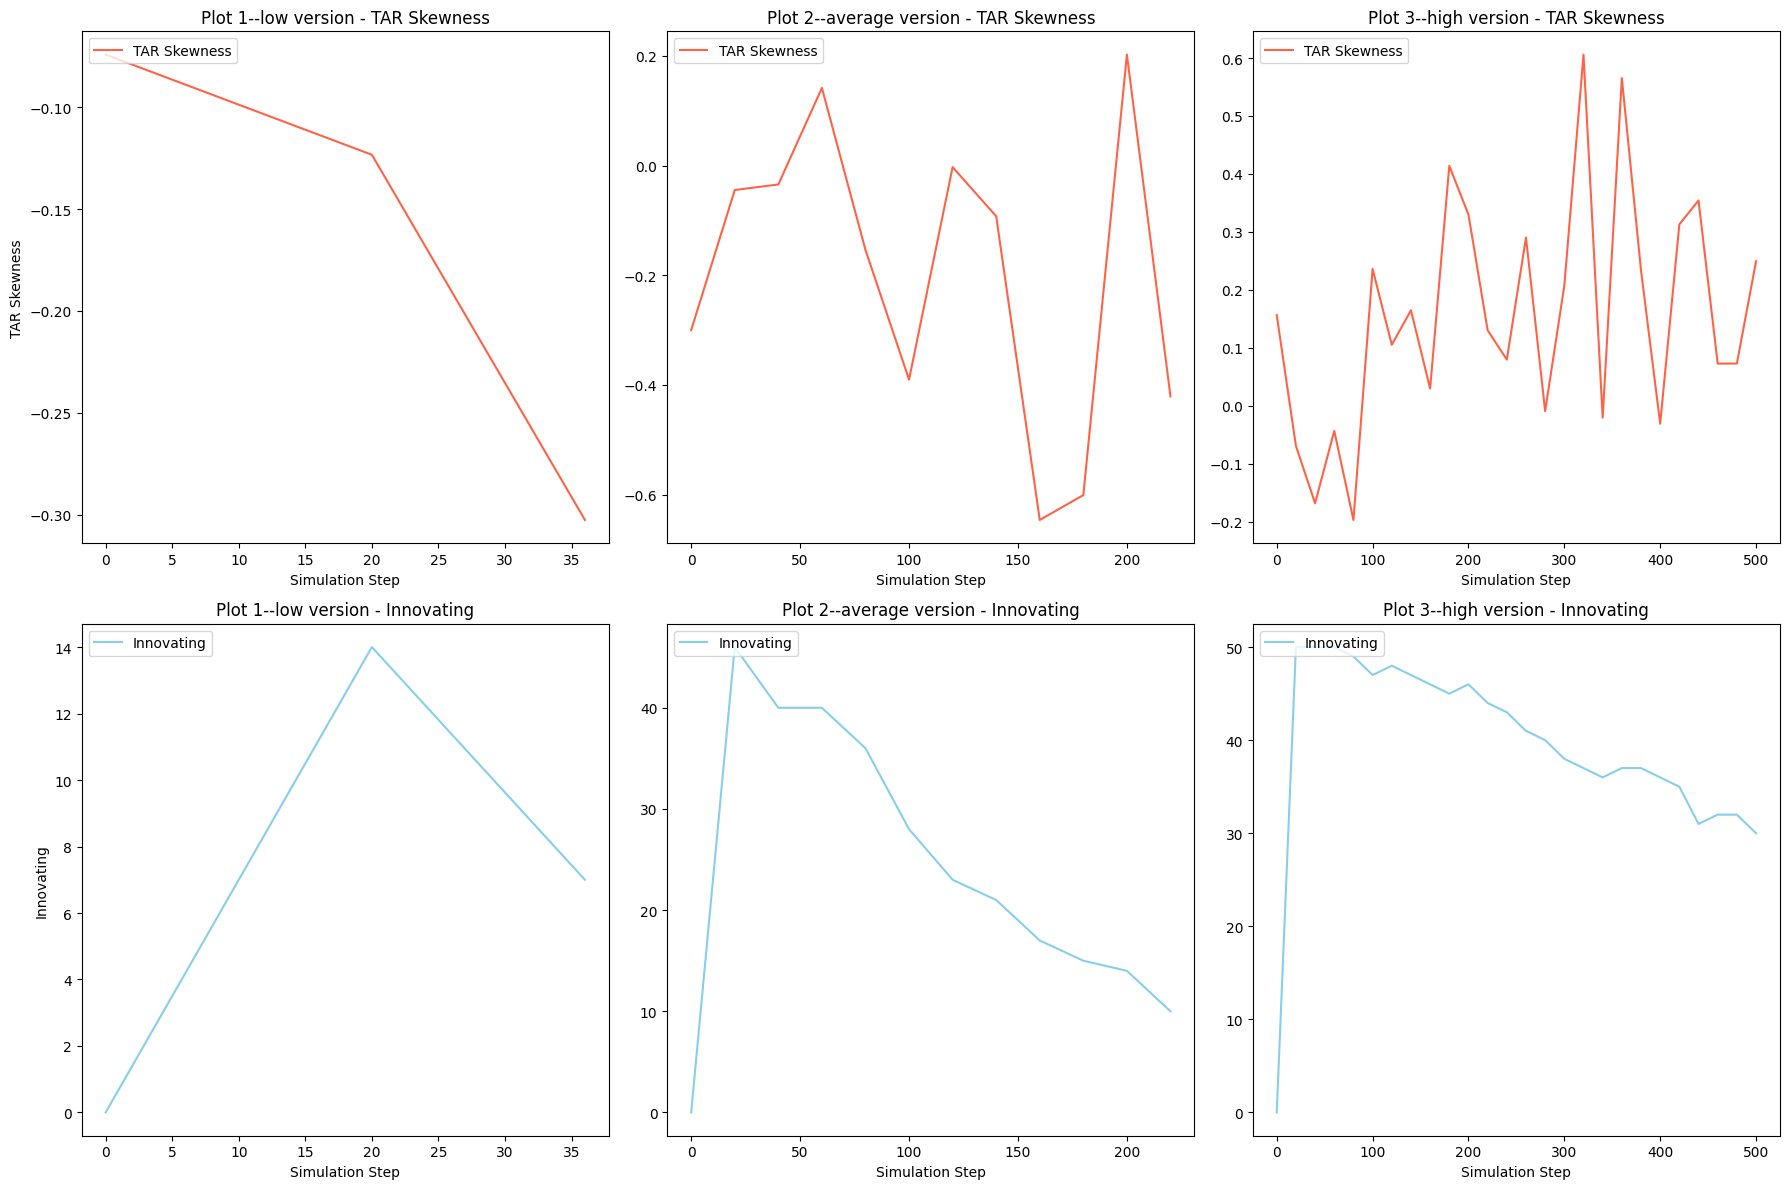

In [3]:
parameter_sets = {
    'Plot 1--low version': {
        "num_firms": 50,
        "avg_node_degree": 3,
        "baseline_success_prob": 0.50,
        "innovation_gap": 10,
        "network_effect": 0.05,
        "distribution": "normal",
        "tar_gain": 6,
        "success_prob_adjustment": 0.08
    },
    'Plot 2--average version': {
        "num_firms": 50,
        "avg_node_degree": 5,
        "baseline_success_prob": 0.50,
        "innovation_gap": 35,
        "network_effect": 0.05,
        "distribution": "normal",
        "tar_gain": 6,
        "success_prob_adjustment": 0.08
    },
    'Plot 3--high version': {
        "num_firms": 50,
        "avg_node_degree": 8,
        "baseline_success_prob": 0.50,
        "innovation_gap": 60,
        "network_effect": 0.05,
        "distribution": "normal",
        "tar_gain": 6,
        "success_prob_adjustment": 0.08
    }
}

def run_and_plot_simulation():
    # Setup for subplots: 2 rows, 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

    for idx, (scenario, params) in enumerate(parameter_sets.items()):
        batch = batch_run(
            InnovationModel,
           	parameters=params,
            max_steps=500,
            iterations=1,
            data_collection_period=20
        )
     
        results = pd.DataFrame(batch)

        # Plot TAR Skewness
        axes[0, idx].plot(results['Step'], results['TAR Skewness'], label='TAR Skewness', color='#FF6347')
        axes[0, idx].set_title(f'{scenario} - TAR Skewness')
        axes[0, idx].set_xlabel('Simulation Step')
        if idx == 0:
            axes[0, idx].set_ylabel('TAR Skewness')
        axes[0, idx].legend(loc='upper left')

        # Plot Innovating
        axes[1, idx].plot(results['Step'], results['Innovating'], label='Innovating', color='#87CEEB')
        axes[1, idx].set_title(f'{scenario} - Innovating')
        axes[1, idx].set_xlabel('Simulation Step')
        if idx == 0:
            axes[1, idx].set_ylabel('Innovating')
        axes[1, idx].legend(loc='upper left')

    plt.tight_layout()  
    plt.show()

run_and_plot_simulation()